# Final model for Bs → ϕμμ

In [ ]:
import ROOT

In [ ]:
workspace_file = ROOT.TFile('../files/wspace_2016_bin3.root')
wspace = workspace_file.Get('wspace.2016.bin3')

In [ ]:
wspace.Print()

Get final model from Workspace

In [ ]:
Bmass = wspace.var('Bmass')
CosThetaK = wspace.var('CosThetaK')
CosThetaL = wspace.var('CosThetaL')
f_final = wspace.pdf('f_final_WithKStar')

In [ ]:
f_final.Print()

In [ ]:
args = f_final.getParameters(ROOT.RooArgSet(Bmass, CosThetaK, CosThetaL))

nSig = args.find('nSig').getVal()
nSigError = args.find('nSig').getError()
nBkgComb = args.find('nBkgComb').getVal()
nBkgPeak = f_final.servers().findByName("nBkgPeak").getVal()

In [ ]:
PeakFrac = f_final.servers().findByName("nBkgPeak").servers().containedObjects()[0].getVal()

In [ ]:
# Show parameters after uploading values from database
for arg in args: print(arg)

#### Initialize parameters from the database

In [ ]:
import json
db = json.load(open("../files/fitResult_bin3.json"))
db

In [ ]:
import re
funcPair = [
        ('setVal', 'getVal'),
        ('setError', 'getError'),
        ('setAsymError', 'getErrorHi'),  # Positive-definite
        ('setAsymError', 'getErrorLo'),  # Negative-definite
        ('setConstant', 'isConstant'),
        ('setMin', 'getMin')]

alias = {}
for arg in args:
    # Append '_ts' (Two Step) to efficiency parameters
    res = re.match(r"^[x|k|l]\d\w*", arg.GetName())
    if res: alias[arg.GetName()] = arg.GetName()+"_ts"
alias['effi_norm'] = 'effi_norm_ts'
alias['hasXTerm'] = 'hasXTerm_ts'

def InitFromDatabase(arg):
    for setter, getter in funcPair:
        argName = arg.GetName()
        aliasName = alias.get(argName, argName)
        if aliasName in db:
            getattr(arg, setter)(
                *{
                    'getErrorHi': (db[aliasName]['getErrorLo'], db[aliasName]['getErrorHi']),
                    'getErrorLo': (db[aliasName]['getErrorLo'], db[aliasName]['getErrorHi']),
                }.get(getter, (db[aliasName][getter],))
            )
            # print(f"Intialized {argName}")
        else:
            print("WARNING\t: Unable to initialize {0}, record {1} not found".format(argName, aliasName))
for arg in args: InitFromDatabase(arg)

In [ ]:
for arg in args: print(arg)

### Exersize:

<div>
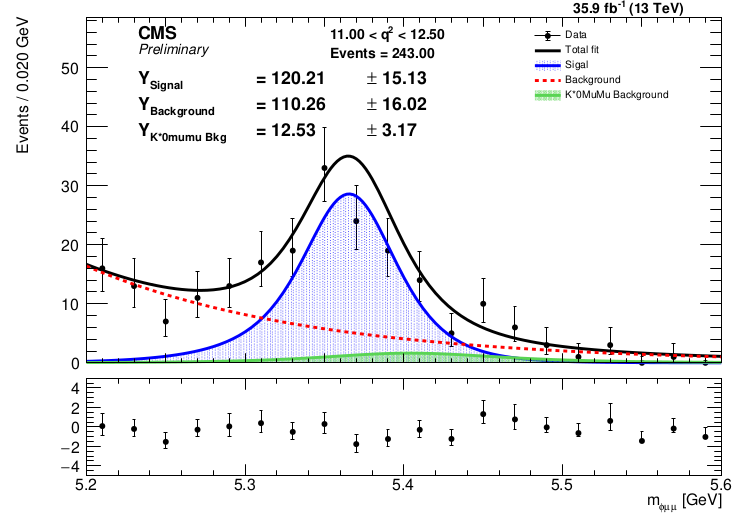
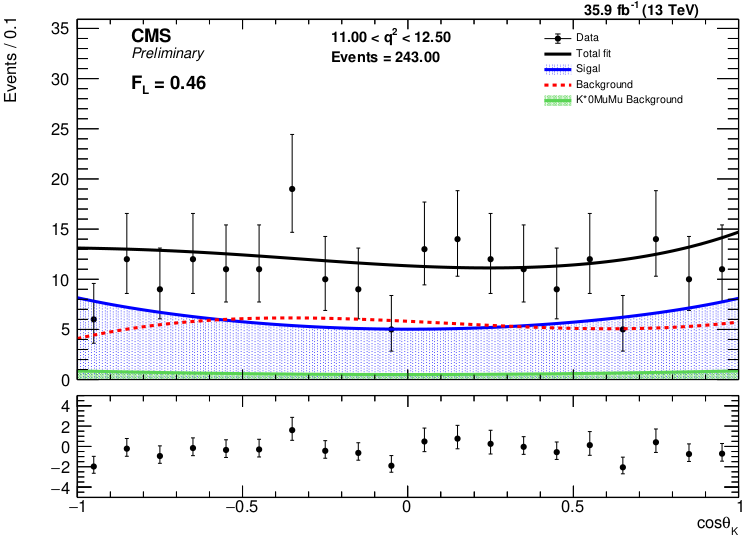
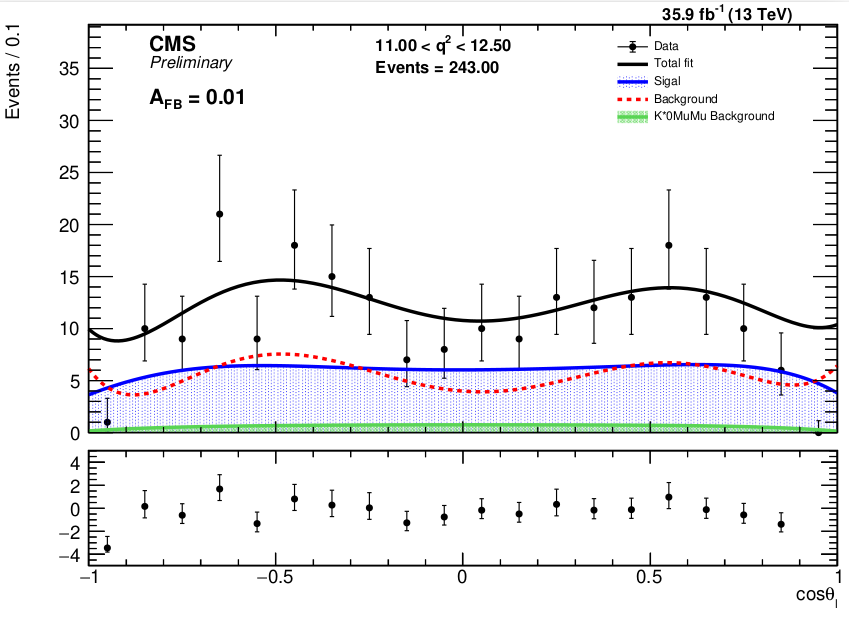
</div>

* Plot `f_final` PDF: You should get 3 plots like shown above
* Do a toy study on this final MODEL
  * Fluctuate `nSig`, `nBkgComb` and `nBkgPeak` normally
  * Fluctuate `unboundAfb`, `unboundFl`, Exponential slope of Bmass background